In [42]:
import numpy as np
import tweepy
import requests
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import json
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


In [43]:
# read the data from file
df_1=pd.read_csv('twitter-archive-enhanced.csv')
# asess
df_1.head()
df_1.info()
df_1.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [44]:
# ref https://365datascience.com/python-requests-package/

url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
file= open('image-predictions.tsv','wb')
file.write(response.content)
file.close()

In [45]:

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [86]:
# read from json file to a df
tweets = []
for line in open('twitter_json.txt', 'r'):
    tweets.append(json.loads(line))


 # we don't want all the columns
df_2 = pd.DataFrame(tweets, columns = ['id','retweet_count', 'favourites_count'])
print(df_2.head(5))

# then combine columns to form a master db
# using inner join on id

master_df = pd.merge(left=df_1, right=df_2, left_on='tweet_id', right_on='id', how='outer')
master_df.drop('id', inplace=True, axis=1) #drop id col since we have tweet_id
print('-----------------------------------------------------')
print(master_df.tail())
# replace 'None' with ''
master_df['doggo'] = master_df['doggo'].replace('None','')
master_df['floofer'] = master_df['floofer'].replace('None','')
master_df['pupper'] = master_df['pupper'].replace('None','')
master_df['puppo'] = master_df['puppo'].replace('None','')
master_df['dog_stage'] = master_df['doggo'] + master_df['floofer'] + master_df['pupper'] + master_df['puppo']

nonunique_stage = master_df[(master_df['doggo'] != '') & (master_df['pupper'] != '')]
print(nonunique_stage.iloc[:, -4:].head())
print(master_df.head(5))


                   id  retweet_count  favourites_count
0  892420643555336193           8853               NaN
1  892177421306343426           6514               NaN
2  891815181378084864           4328               NaN
3  891689557279858688           8964               NaN
4  891327558926688256           9774               NaN
-----------------------------------------------------
                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  20

In [47]:
#hypenate two stages
master_df.loc[master_df.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo-pupper'
master_df.loc[master_df.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo-floofer'
master_df.loc[master_df.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo-puppo'

nonunique_stage = master_df[(master_df['doggo'] != '') & (master_df['pupper'] != '')]

print(nonunique_stage.iloc[:, -4:].head())

# drop the 4 columns

cols_to_drop = ['doggo','floofer','pupper','puppo'] 
master_df.drop(cols_to_drop, inplace=True, axis=1) 

# replace '' with NaN in dog_stage
master_df['dog_stage'] = master_df['dog_stage'].replace('', np.nan)

# replace None with NaN in name
master_df['name'] = master_df['name'].replace('None', np.nan)
print(master_df['name'].tail())
# delete rows where in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are not NaN
# i.e retweet or reply tweets
# ref: https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving
master_df=master_df[master_df['in_reply_to_status_id'].isnull()]
master_df=master_df[master_df['in_reply_to_user_id'].isnull()]
master_df=master_df[master_df['retweeted_status_id'].isnull()]
master_df=master_df[master_df['retweeted_status_user_id'].isnull()]
print(master_df.tail())
# now drop the columns
cols_to_drop = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id'] 
master_df.drop(cols_to_drop, inplace=True, axis=1) 
print(list(master_df.columns))

    puppo  retweet_count  favourites_count     dog_stage
460               3084.0               NaN  doggo-pupper
531               2525.0               NaN  doggo-pupper
565               1573.0               NaN  doggo-pupper
575               2429.0               NaN  doggo-pupper
705               2561.0               NaN  doggo-pupper
2351    NaN
2352      a
2353      a
2354      a
2355    NaN
Name: name, dtype: object
                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   

In [48]:
# modify timestamp change from string to datetime and removing timezone
#ref: https://stackoverflow.com/questions/19738169/convert-column-of-date-objects-in-pandas-dataframe-to-strings/33967346
# https://stackoverflow.com/questions/58598970/remove-timezone-0100-from-datetime

master_df['timestamp'] = pd.to_datetime(master_df['timestamp'])
master_df['timestamp'] = master_df['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

print(master_df.tail())
values_greater = master_df[(master_df['rating_denominator']>10)]

print(values_greater.iloc[:, -6:])

# Calculating the dogs counts in the tweets featuring many dogs
dogs_count = master_df.rating_denominator[(master_df['rating_denominator']>10)]/10

# Check the dog_count with their indices:
print('**************************************')
print(dogs_count)

# Performing the Calculations

master_df.loc[master_df.rating_numerator >= 40, ['rating_numerator', 'rating_denominator']] = [master_df.rating_numerator[master_df.rating_numerator >= 40]/dogs_count ,10]
master_df.tail()

# getting 'a' in name columns
# invalid_names_a=master_df[(master_df['name']=='a')]
# print('----------------invalid-----------------')
# print(invalid_names.head())
# change it to nan
print('#########check##########')
print(master_df.head())
master_df['name'] = master_df['name'].replace('a', np.nan)
print('#########last check##########')
print(master_df.tail())


                tweet_id            timestamp  \
2351  666049248165822465  2015-11-16 00:24:50   
2352  666044226329800704  2015-11-16 00:04:52   
2353  666033412701032449  2015-11-15 23:21:54   
2354  666029285002620928  2015-11-15 23:05:30   
2355  666020888022790149  2015-11-15 22:32:08   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
2351  Here we have a 1949 1st generation vulpix. Enj...   
2352  This is a purebred Piers Morgan. Loves to Netf...   
2353  Here is a very happy pup. Big fan of well-main...   
2354  This is a western brown Mitsubishi terrier. Up...   
2355  Here we have a Japanese Irish Setter. Lost eye...

In [49]:
master_df.to_csv('cleaned_data.csv')

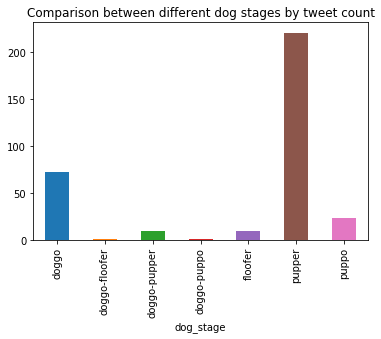

In [50]:
counts=master_df['dog_stage'].groupby(master_df['dog_stage']).count()
counts.plot(kind='bar',title='Comparison between different dog stages by tweet count')


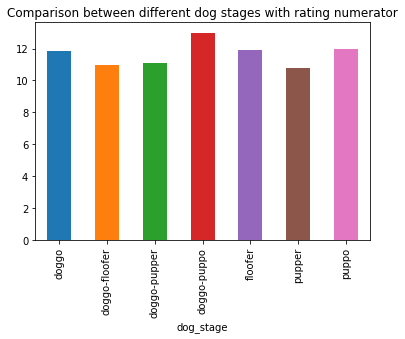

In [51]:
mean_rating=master_df.groupby(master_df['dog_stage']).mean()['rating_numerator']
mean_rating.plot(kind='bar', title='Comparison between different dog stages with rating numerator')


   timestamp
0       2017
1       2017
2       2017
3       2017
4       2017
   retweet_count
0         8853.0
1         6514.0
2         4328.0
3         8964.0
4         9774.0
   timestamp  retweet_count
0       2017         8853.0
1       2017         6514.0
2       2017         4328.0
3       2017         8964.0
4       2017         9774.0


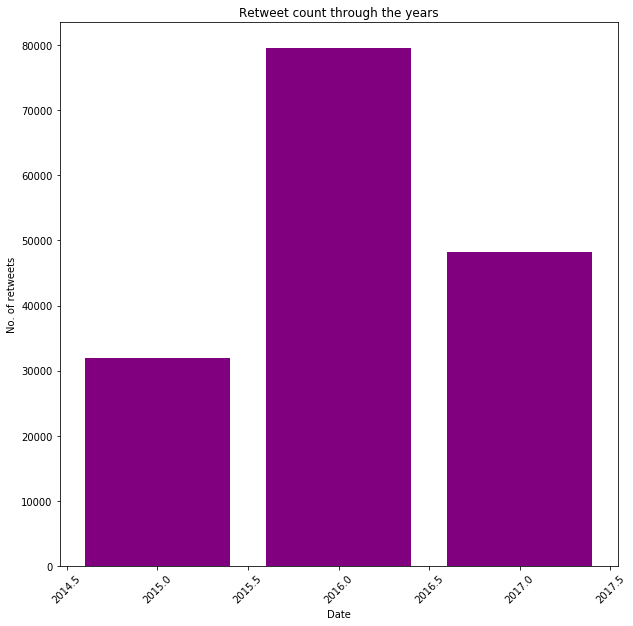

In [84]:
master_df['timestamp'] = pd.to_datetime(master_df['timestamp'], errors='coerce')
df=DataFrame(master_df, columns=['timestamp'])
df['timestamp']=df['timestamp'].dt.year
print(df.head())
df2=DataFrame(master_df, columns=['retweet_count'])

print(df2.head())

df.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df3 = pd.concat([df, df2], axis=1, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)
# Create figure and plot space
print(df3.head())
# df3.plot(x ='timestamp', y='retweet_count', kind = 'line')
# plt.show()

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(df3['timestamp'],
       df3['retweet_count'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="No. of retweets",
       title="Retweet count through the years")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()


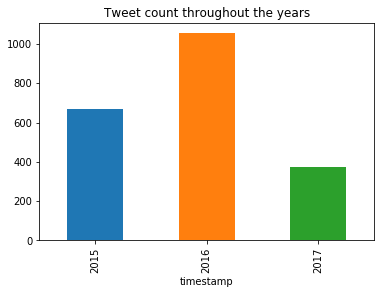

In [89]:
tweet_count=df['timestamp'].groupby(df['timestamp']).count()
tweet_count.plot(kind='bar',title='Tweet count throughout the years')


## data quality issues:
- cells that contain none in th dog types columns
- none in the column name
- drop rows that have a in_reply_to_status_id and retweeted_status_id value, these are retweets or reply tweets
- the +0000 in the timestamp, it's the same for all rows and doesn't serve a purpose
- inconsistent rating numerators 
- inconsistent rating dominators
- Dog types are not mutually exlusive, each dog can have one or more dog stage
- names with 'a' in the column

## data tidiness issues
- There is no need for four columns to represent dog stage, one column is enough to represent dog stage
- remove in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id columns after removing the rows that have values in them

### References
- https://365datascience.com/python-requests-package/
- https://datatofish.com/load-json-pandas-dataframe/
- https://stackoverflow.com/questions/59094921/parsing-data-from-json-tweepy-into-a-pandas-dataframe
- https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html
- https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/subset-time-series-data-python/
- https://stackoverflow.com/questions/40339886/pandas-concat-generates-nan-values